In [6]:
%matplotlib inline  
import numpy as np                                                                  
import flopy

In [7]:
# Assign name and create modflow model object                                    
modelname = 'confined'                                                          
mf = flopy.modflow.Modflow(modelname, exe_name='/Users/biancawright/modflow/mf2005')

In [8]:
# Model domain and grid definition 
Lx = 1000.                                                                       
Ly = 1000.                                                                       
ztop = 0.                                                                        
zbot = -50.                                                                      
nlay = 1                                                                         
nrow = 10                                                                        
ncol = 10                                                                        
delr = Lx/ncol                                                                   
delc = Ly/nrow                                                                   
delv = (ztop - zbot) / nlay                                                      
botm = np.linspace(ztop, zbot, nlay + 1)

In [9]:
# Create the discretization object
dis = flopy.modflow.ModflowDis(mf, nlay, nrow, ncol, delr=delr, delc=delc,
                               top=ztop, botm=botm[1:])

In [10]:
# Variables for the BAS package
ibound = np.ones((nlay, nrow, ncol), dtype=np.int32)
ibound[:, :, 0] = -1
ibound[:, :, -1] = -1
strt = np.ones((nlay, nrow, ncol), dtype=np.float32)
strt[:, :, 0] = 10.
strt[:, :, -1] = 0.
bas = flopy.modflow.ModflowBas(mf, ibound=ibound, strt=strt)

In [11]:
# Add LPF package to the MODFLOW model                                           
lpf = flopy.modflow.ModflowLpf(mf, hk=10., vka=10., ipakcb=53)

In [12]:
# Add OC package to the MODFLOW model
spd = {(0, 0): ['print head', 'print budget', 'save head', 'save budget']}
oc = flopy.modflow.ModflowOc(mf, stress_period_data=spd, compact=True)

In [13]:
# Add PCG package to the MODFLOW model
pcg = flopy.modflow.ModflowPcg(mf)

In [14]:
# Write the MODFLOW model input files
mf.write_input()

In [15]:
# Run the MODFLOW model
success, buff = mf.run_model()

FloPy is using the following executable to run the model: /Users/biancawright/modflow/mf2005

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: confined.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2017/11/23 14:15:32

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2017/11/23 14:15:32
 Elapsed run time:  0.007 Seconds

  Normal termination of simulation


/Users/biancawright/anaconda3/lib/python3.6/site-packages/flopy/utils/binaryfile.py:756: FutureWarning: Assignment between structured arrays with different field names will change in numpy 1.14.

Previously fields in the dst would be set to the value of the identically-named field in the src. In numpy 1.14 fields will instead be assigned 'by position': The Nth field of the dst will be set to the Nth field of the src array.

See the release notes for details
  header2 = header2.astype(self.header2_dtype)


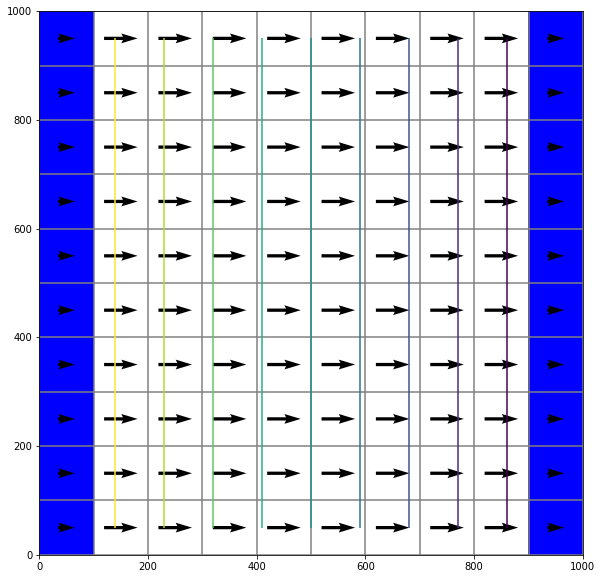

FloPy is using the following executable to run the model: /Users/biancawright/modflow/mf2005

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: confined.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2017/11/23 14:15:32

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2017/11/23 14:15:32
 Elapsed run time:  0.003 Seconds

  Normal termination of simulation


In [16]:
# Post process the results                                                       
import matplotlib.pyplot as plt                                                  
import flopy.utils.binaryfile as bf                                              
fig = plt.figure(figsize=(10,10))                                                
ax = fig.add_subplot(1, 1, 1, aspect='equal')                                    
                                                                                  
hds = bf.HeadFile(modelname+'.hds')                                              
times = hds.get_times()                                                          
head = hds.get_data(totim=times[-1])                                             
levels = np.linspace(0, 10, 11)                                                  
                                                                                  
cbb = bf.CellBudgetFile(modelname+'.cbc')                                        
kstpkper_list = cbb.get_kstpkper()                                               
frf = cbb.get_data(text='FLOW RIGHT FACE', totim=times[-1])[0]                   
fff = cbb.get_data(text='FLOW FRONT FACE', totim=times[-1])[0]                   
                                                                                  
modelmap = flopy.plot.ModelMap(model=mf, layer=0)                                
qm = modelmap.plot_ibound()                                                      
lc = modelmap.plot_grid()                                                        
cs = modelmap.contour_array(head, levels=levels)                                 
quiver = modelmap.plot_discharge(frf, fff, head=head)                            
plt.show()# Run the MODFLOW model
success, buff = mf.run_model()